# Time Series Geodata

Data is private so it's not provided together with this notebook

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [2]:
from datetime import datetime

In [3]:
from dateutil import parser

## Load and Clean Data

In [4]:
%%bash
ls 

audio-processing.ipynb
geodata.ipynb
time-series-data.ipynb


In [5]:
file = '../../../OneDrive - University of New Mexico/data/moves-data/csv/yearly/storyline/storyline_2017.csv'
df = pd.read_csv(file)

In [6]:
homedf = df[df['Name']=='Home']
workdf = df[df['Name']=='UNM Physics & Astronomy']
# homedf.set_index(['Date','Duration'])
# homedf

In [26]:
homedur = homedf.groupby('Date').Duration.sum().reset_index();
homedur = homedur.rename(columns={'Duration': 'HomeDuration'});
workdur = workdf.groupby('Date').Duration.sum().reset_index();
workdur = workdur.rename(columns={'Duration': 'WorkDuration'});

In [40]:
totaldf = pd.merge(homedur,workdur, how='left')

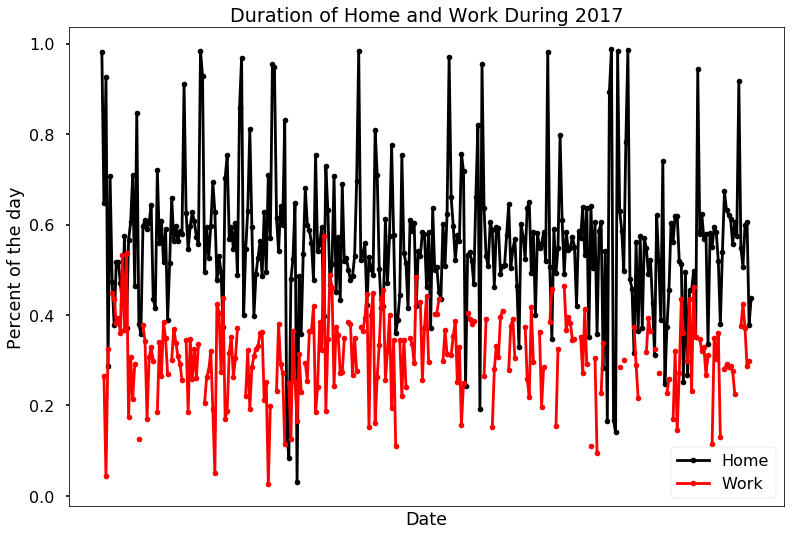

In [84]:
plt.plot(totaldf['Date'].values, totaldf['HomeDuration'].values/(24*3600), 'k-', marker='.', label='Home')
plt.plot(totaldf['Date'].values, totaldf['WorkDuration'].values/(24*3600), 'r-', marker='.', label='Work')

plt.locator_params(axis='y', nbins=6)
# plt.locator_params(axis='x', nbins=6)
plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off',
    labelbottom='off')

plt.ylabel('Percent of the day')
plt.xlabel('Date')
plt.title('Duration of Home and Work During 2017')
plt.legend()
plt.show()

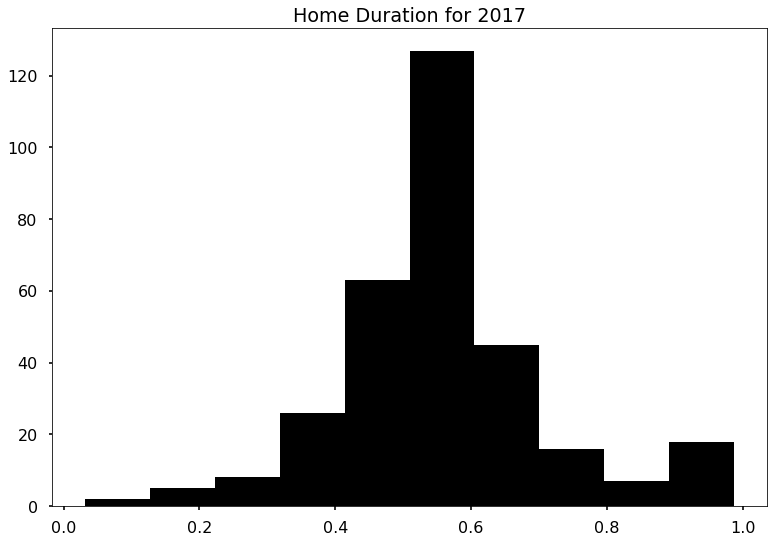

In [96]:
plt.hist(totaldf['HomeDuration'].values/(24*3600), facecolor='k')
plt.title('Home Duration for 2017')
plt.show()

I define the mode in histogram to be the Home-Mode-Index. In this case it's 0.5.

I define the average time at home to be the Home-AVG-Index. In my case it's:

In [95]:
totaldf['HomeDuration'].sum()/(24*3600)/len(totaldf['HomeDuration'])

0.5587051276434163

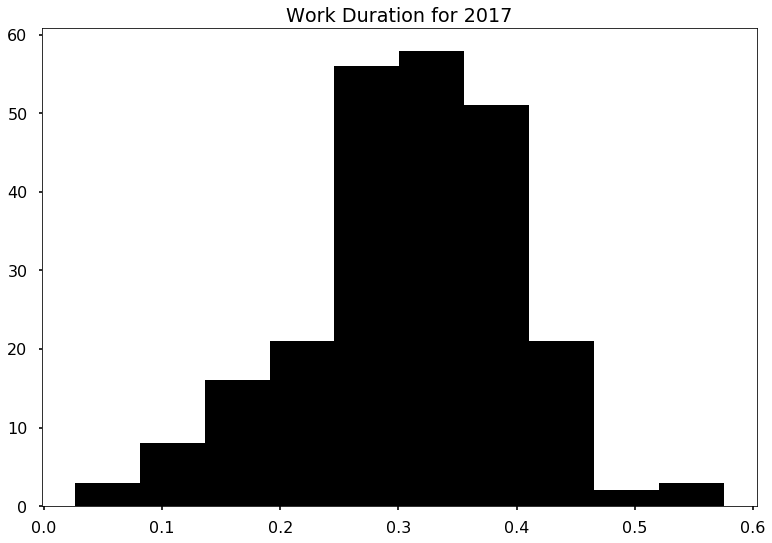

In [102]:
plt.hist(totaldf['WorkDuration'].dropna().values/(24*3600), facecolor='k')
plt.title('Work Duration for 2017')
plt.show()

In [103]:
totaldf['WorkDuration'].dropna().sum()/(24*3600)/len(totaldf['WorkDuration'].dropna())

0.30993137881605454

## Functions

In [134]:
def CleanData(filepath, method=None):
    
    if method == None:
        method = 'outer'
        
    df = pd.read_csv(filepath)

    hdf = df[df['Name']=='Home']
    wdf = df[df['Name']=='UNM Physics & Astronomy']
    
    hdur = hdf.groupby('Date').Duration.sum().reset_index();
    hdur = hdur.rename(columns={'Duration': 'HomeDuration'});
    wdur = wdf.groupby('Date').Duration.sum().reset_index();
    wdur = wdur.rename(columns={'Duration': 'WorkDuration'});
    
    tdf = pd.merge(hdur,wdur, how=method)
    tdf['Date'] = pd.to_datetime(tdf.Date)
    tdf = tdf.sort_values(by='Date')
    
    return tdf

In [161]:
# data2013 = '../../../OneDrive - University of New Mexico/data/moves-data/csv/yearly/storyline/storyline_2013.csv'
# df2013 = CleanData(data2013,'outer')

data2014 = '../../../OneDrive - University of New Mexico/data/moves-data/csv/yearly/storyline/storyline_2014.csv'
df2014 = CleanData(data2014,'outer')

data2015 = '../../../OneDrive - University of New Mexico/data/moves-data/csv/yearly/storyline/storyline_2015.csv'
df2015 = CleanData(data2015,'outer')

data2016 = '../../../OneDrive - University of New Mexico/data/moves-data/csv/yearly/storyline/storyline_2016.csv'
df2016 = CleanData(data2016,'outer')

data2017 = '../../../OneDrive - University of New Mexico/data/moves-data/csv/yearly/storyline/storyline_2017.csv'
df2017 = CleanData(data2017, 'outer')

In [140]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
#     print(df2015)

In [145]:
def plotSeries(tdf, styles=None, markers=None):
    
    if styles==None:
        styles=['k-','r-']
        
    if markers == None:
        markers=['.','.']

    plt.plot(tdf['Date'].values, tdf['HomeDuration'].values/(24*3600), styles[0], marker=markers[0], label='Home')
    plt.plot(tdf['Date'].values, tdf['WorkDuration'].values/(24*3600), styles[1], marker=markers[1], label='Work')

    plt.locator_params(axis='y', nbins=6)
    # plt.locator_params(axis='x', nbins=6)
    plt.tick_params(
        axis='x',
        which='both',
        bottom='off',
        top='off',
        labelbottom='off')

    plt.ylabel('Percent of the day')
    plt.xlabel('Date')
    plt.legend()

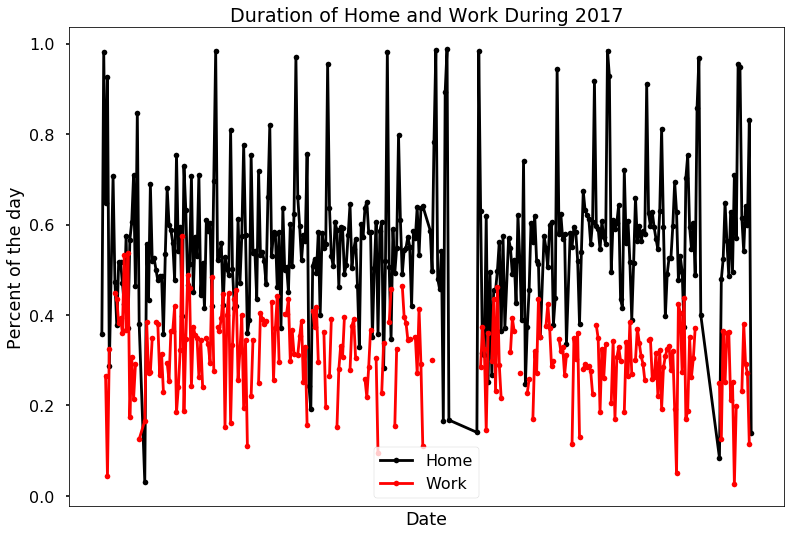

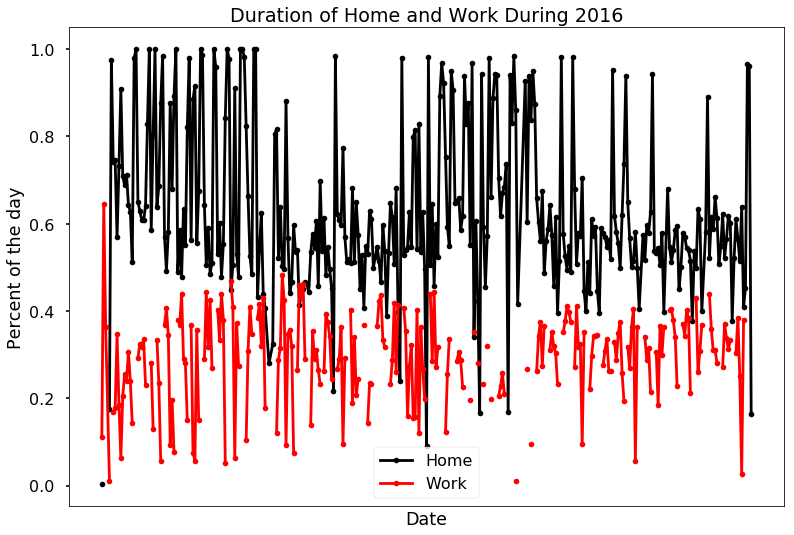

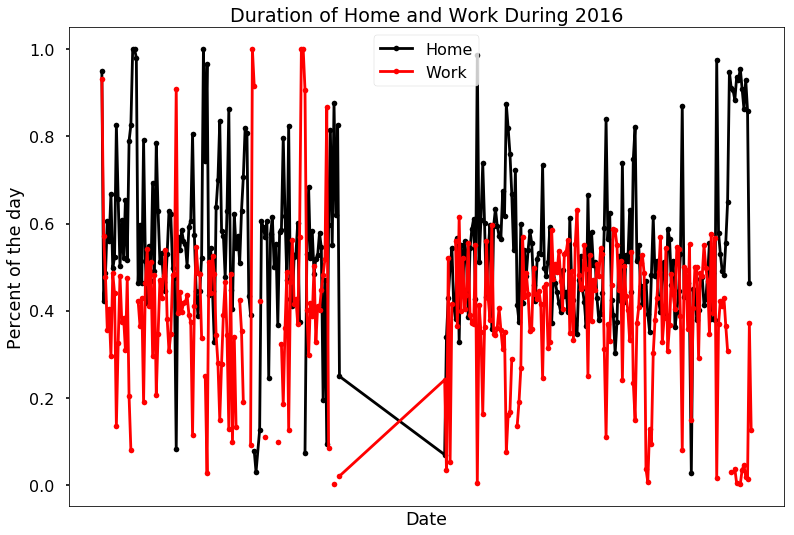

In [151]:
plotSeries(df2017)
plt.title('Duration of Home and Work During 2017')
plt.show()

plotSeries(df2016)
plt.title('Duration of Home and Work During 2016')
plt.show()

plotSeries(df2015)
plt.title('Duration of Home and Work During 2016')
plt.show()

In [154]:
df2016['HomeDuration'].sum()/(24*3600)/len(df2016['HomeDuration'])
df2016['WorkDuration'].sum()/(24*3600)/len(df2016['WorkDuration'])

0.20510375083166998

In [155]:
df2015['HomeDuration'].sum()/(24*3600)/len(df2015['HomeDuration'])
df2015['WorkDuration'].sum()/(24*3600)/len(df2015['WorkDuration'])

0.3528205364833272

In [156]:
df2014['HomeDuration'].sum()/(24*3600)/len(df2014['HomeDuration'])
df2014['WorkDuration'].sum()/(24*3600)/len(df2014['WorkDuration'])

0.3832610887096774

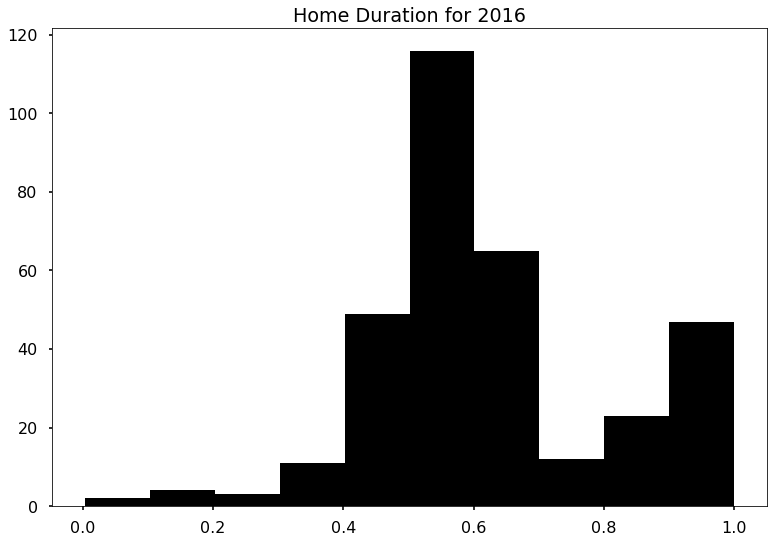

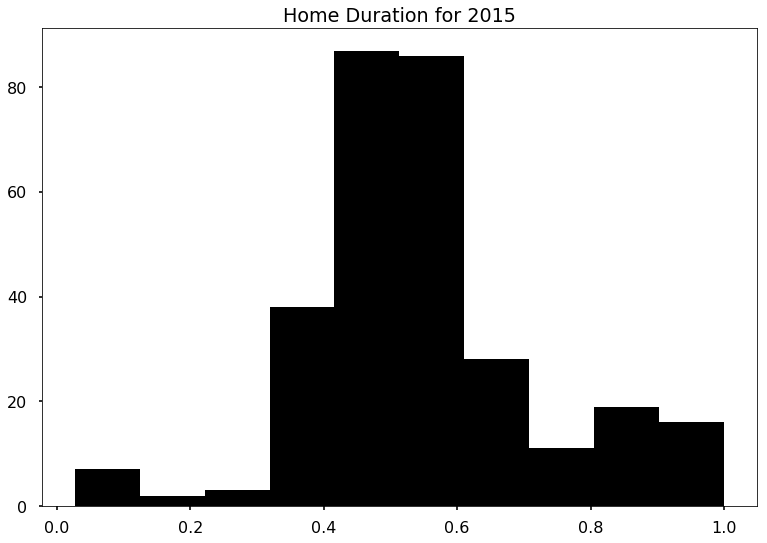

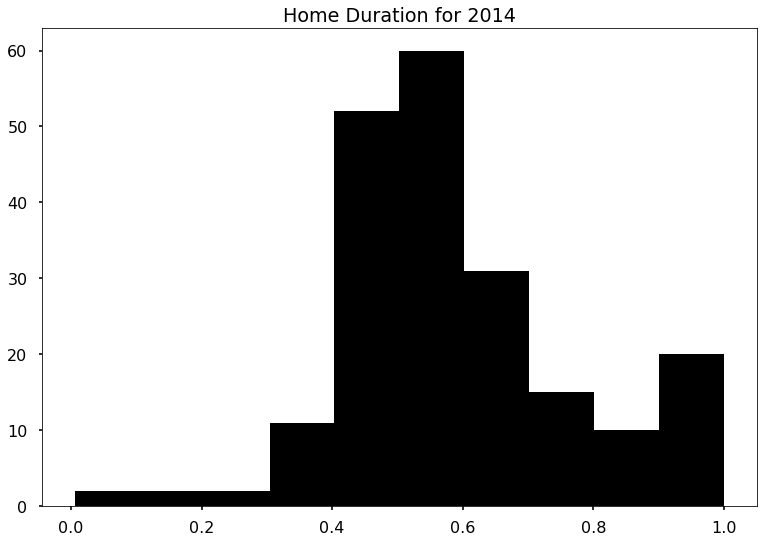

In [165]:
plt.hist(df2016['HomeDuration'].dropna().values/(24*3600), facecolor='k')
plt.title('Home Duration for 2016')
plt.show()

plt.hist(df2015['HomeDuration'].dropna().values/(24*3600), facecolor='k')
plt.title('Home Duration for 2015')
plt.show()

plt.hist(df2014['HomeDuration'].dropna().values/(24*3600), facecolor='k')
plt.title('Home Duration for 2014')
plt.show()

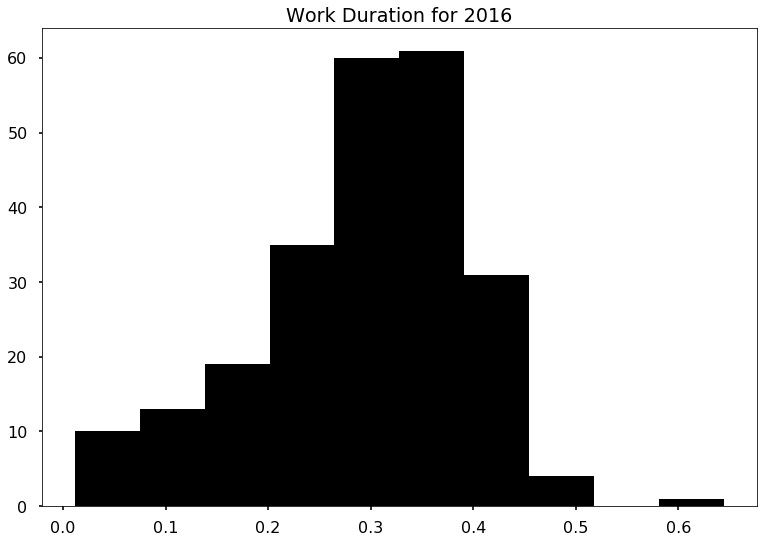

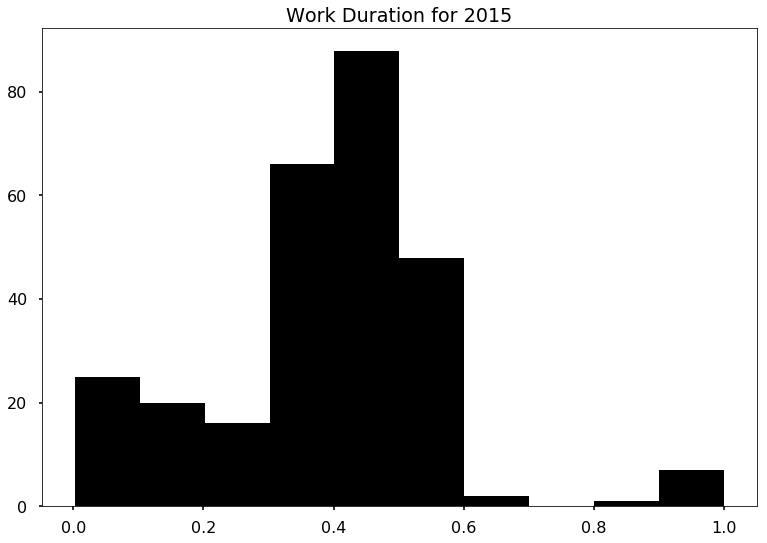

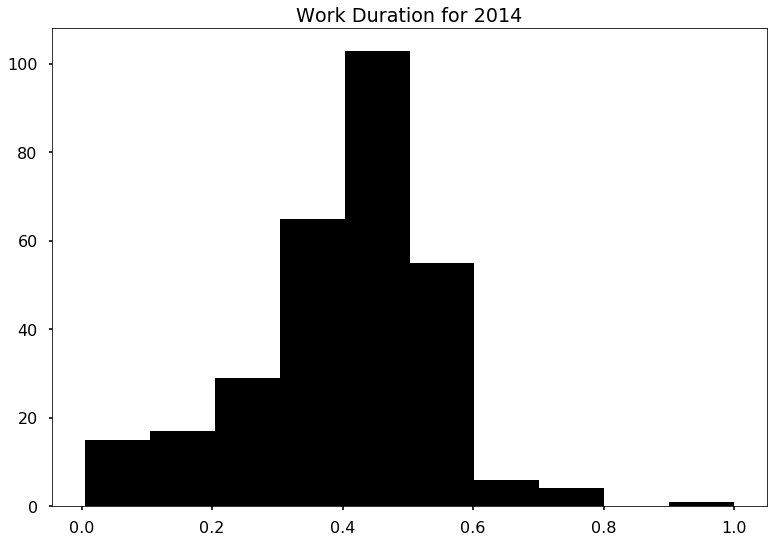

In [168]:
plt.hist(df2016['WorkDuration'].dropna().values/(24*3600), facecolor='k')
plt.title('Work Duration for 2016')
plt.show()

plt.hist(df2015['WorkDuration'].dropna().values/(24*3600), facecolor='k')
plt.title('Work Duration for 2015')
plt.show()

plt.hist(df2014['WorkDuration'].dropna().values/(24*3600), facecolor='k')
plt.title('Work Duration for 2014')
plt.show()